In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
df.rename(columns={"Genre":"Gender"},inplace=True)

In [27]:
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.tail()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [29]:
df.shape

(200, 5)

In [30]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
df.dtypes

CustomerID             int64
Gender                object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [32]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [33]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [34]:
df.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


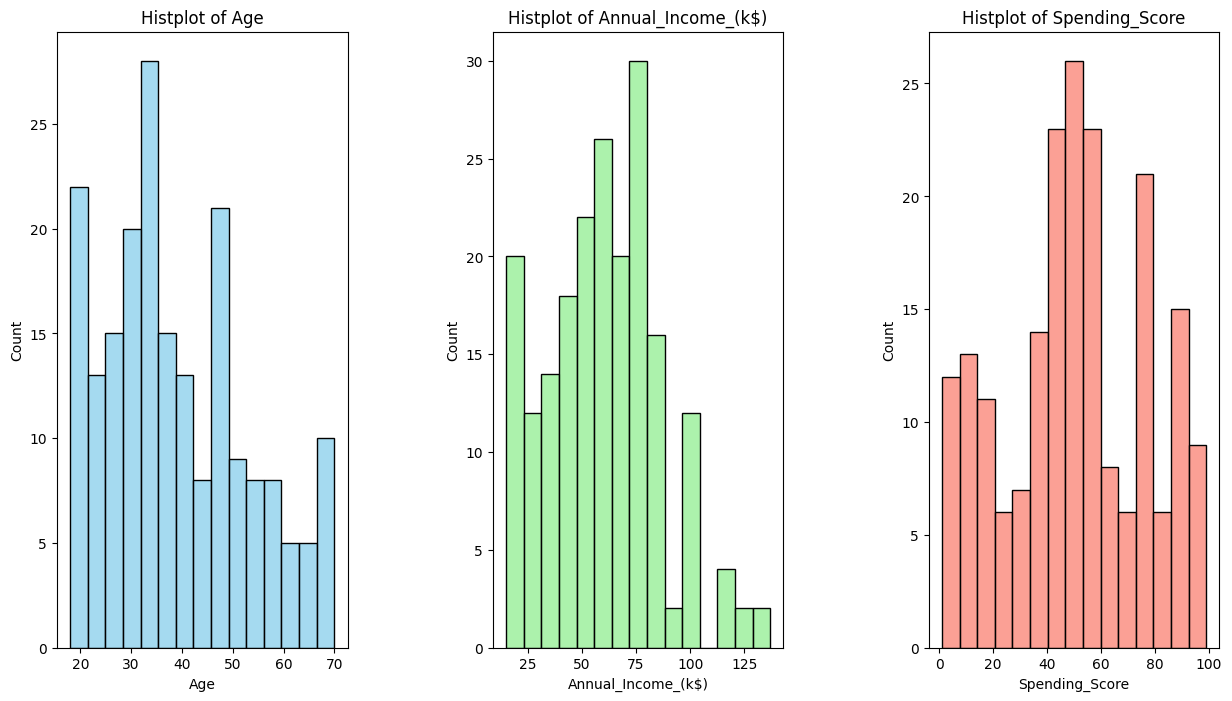

In [35]:
plt.figure(1, figsize=(15, 8))
n = 0
# Define different colors for each histogram
colors = ['skyblue', 'lightgreen', 'salmon']
for i, color in zip(['Age', 'Annual_Income_(k$)', 'Spending_Score'], colors):
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[i], bins=15, color=color) 
    plt.title('Histplot of {}'.format(i))
plt.show()

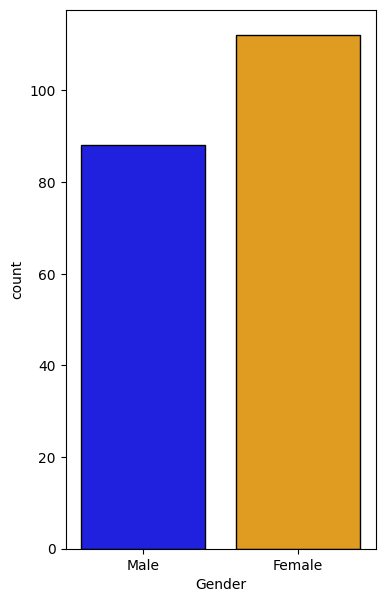

In [36]:
plt.figure(figsize=(4,7))
c=['blue','orange']
sns.countplot(data=df, x='Gender',palette=c , hue='Gender',edgecolor='black')
plt.show()

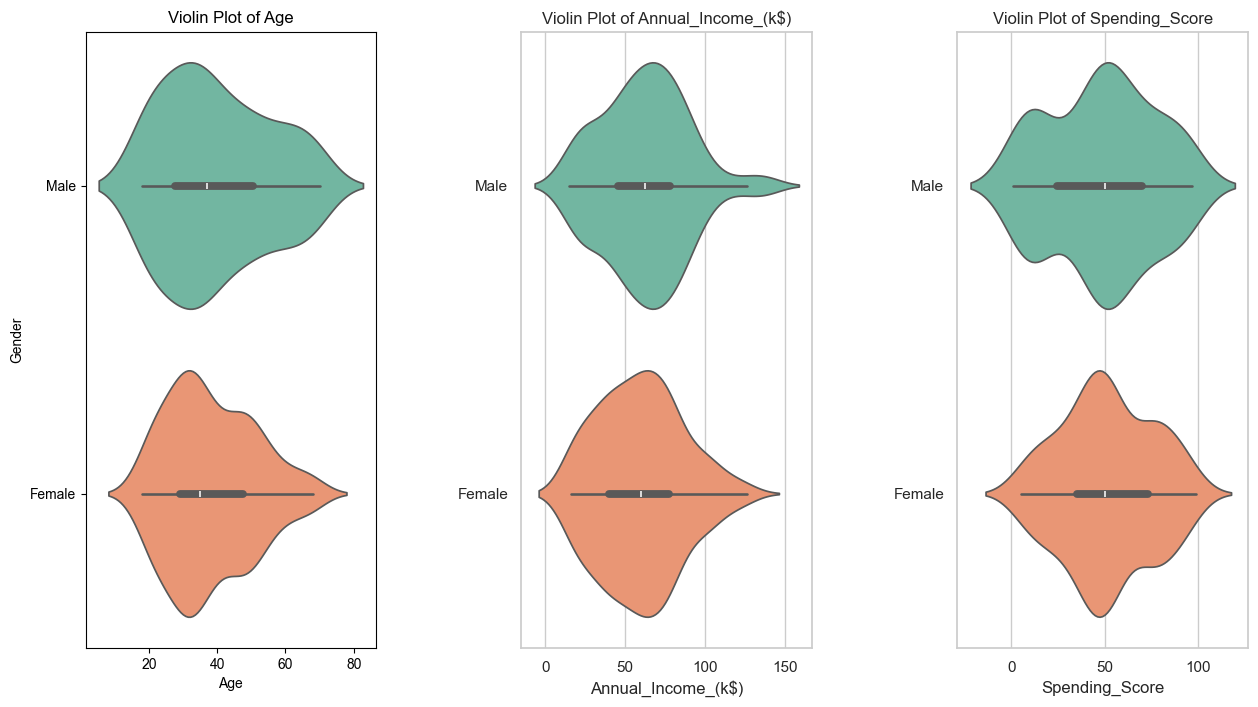

In [37]:
plt.figure(1, figsize=(15, 8))
n = 0
for i in ['Age', 'Annual_Income_(k$)', 'Spending_Score']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(data=df, x=i, y='Gender', palette='Set2',hue='Gender')
    plt.ylabel('Gender' if n == 1 else '') 
    plt.title('Violin Plot of {}'.format(i))
plt.show()


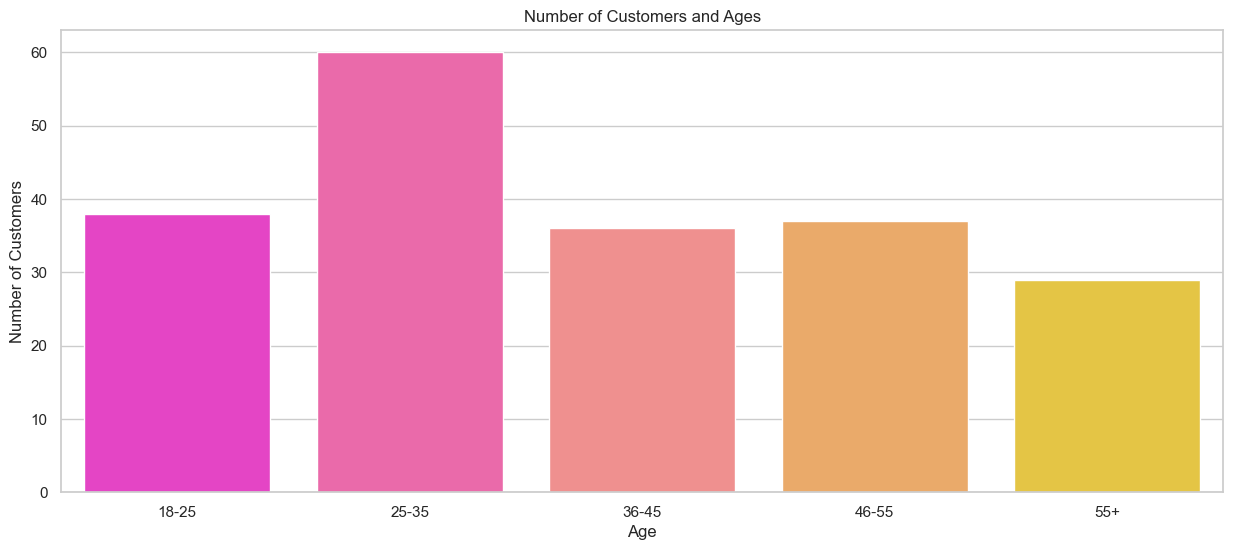

In [38]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)] 
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)] 
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)] 
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)] 
age_55_above = df.Age[(df.Age >= 56)] 

age_x = ["18-25","25-35","36-45","46-55","55+"]
age_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55_above.values)]



Age_df = pd.DataFrame({"age_group": age_x, "customer_count": age_y})

plt.figure(figsize=(15, 6))
sns.barplot(x="age_group", y="customer_count", hue="age_group", data=Age_df, palette='spring', dodge=False)  
plt.title('Number of Customers and Ages')
plt.xlabel("Age")
plt.ylabel('Number of Customers')
plt.legend([], [], frameon=False)  # Hide the redundant legend
plt.show()


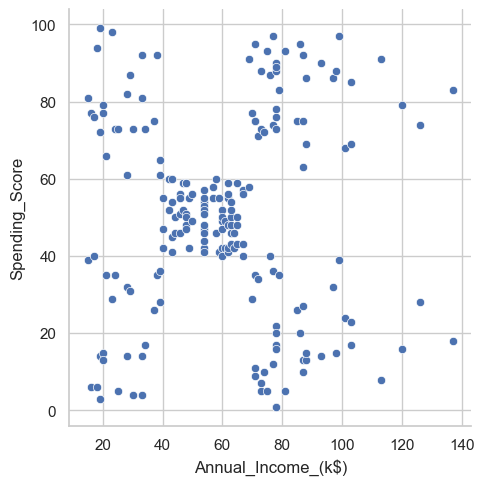

In [39]:
sns.relplot(x='Annual_Income_(k$)', y='Spending_Score',data=df)
plt.show()

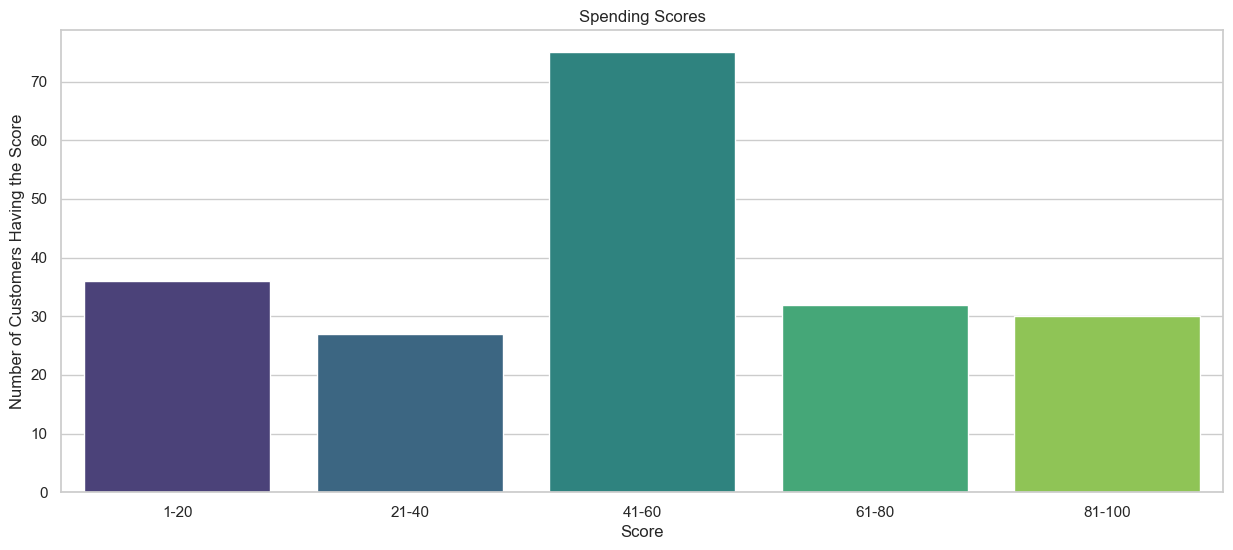

In [40]:
ss_1_20 = df["Spending_Score"][(df["Spending_Score"] >= 1) & (df["Spending_Score"] <= 20)]
ss_21_40 = df["Spending_Score"][(df["Spending_Score"] >= 21) & (df["Spending_Score"] <= 40)]
ss_41_60 = df["Spending_Score"][(df["Spending_Score"] >= 41) & (df["Spending_Score"] <= 60)]
ss_61_80 = df["Spending_Score"][(df["Spending_Score"] >= 61) & (df["Spending_Score"] <= 80)]
ss_81_100 = df["Spending_Score"][(df["Spending_Score"] >= 81) & (df["Spending_Score"] <= 100)]

ss_x = ["1-20","21-40","41-60","61-80","81-100"]
ss_y = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]


plt.figure(figsize=(15, 6))
sns.barplot(x=ss_x, y=ss_y, palette='viridis', hue=ss_x, dodge=False)  
plt.title('Spending Scores')
plt.xlabel("Score")
plt.ylabel('Number of Customers Having the Score')
plt.legend([], [], frameon=False)  # Hide the redundant legend
plt.show()

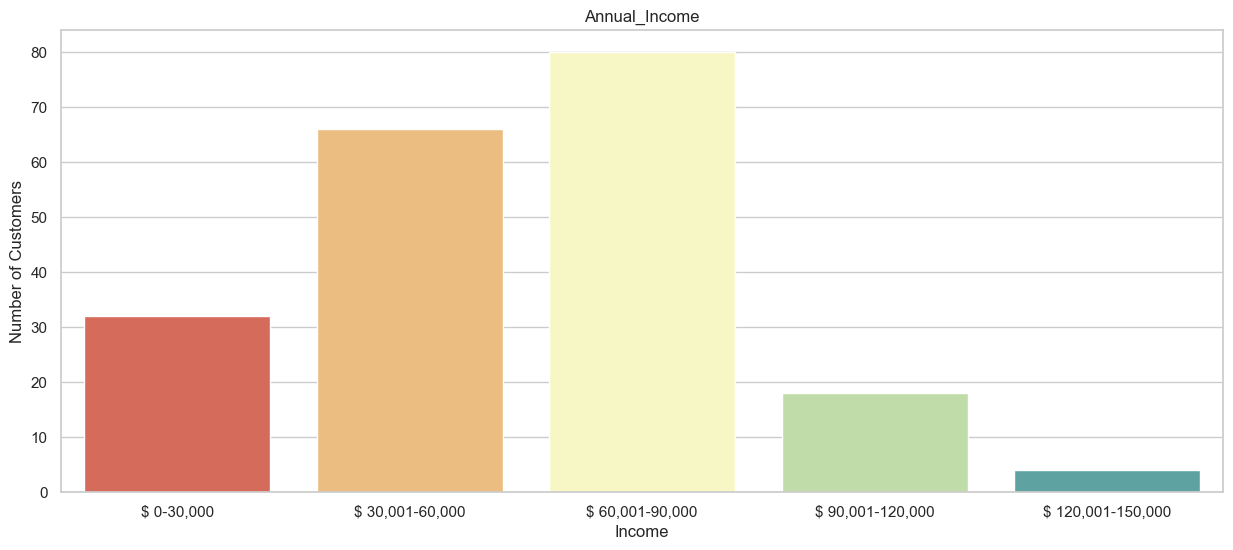

In [41]:
ai_0_30 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 0) & (df["Annual_Income_(k$)"] <= 30)]
ai_31_60 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 31) & (df["Annual_Income_(k$)"] <= 60)]
ai_61_90 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 61) & (df["Annual_Income_(k$)"] <= 90)]
ai_91_120 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 91) & (df["Annual_Income_(k$)"] <= 120)]
ai_121_150 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 121) & (df["Annual_Income_(k$)"] <= 150)]

ai_x = ["$ 0-30,000","$ 30,001-60,000","$ 60,001-90,000","$ 90,001-120,000","$ 120,001-150,000"]
ai_y = [len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]


plt.figure(figsize=(15, 6))
sns.barplot(x=ai_x, y=ai_y, palette='Spectral', hue=ai_x, dodge=False)  
plt.title('Annual_Income')
plt.xlabel("Income")
plt.ylabel('Number of Customers')
plt.legend([], [], frameon=False)  # Hide the redundant legend
plt.show()

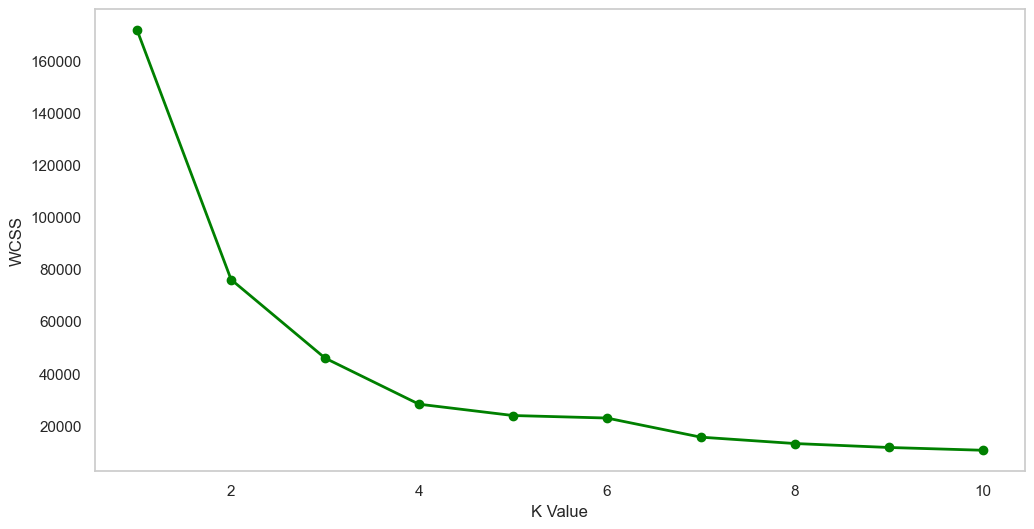

In [42]:
X1 = df.loc[:,["Age","Spending_Score"]].values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='green', marker="o")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [43]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [44]:
centroid = kmeans.cluster_centers_
print(centroid)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.40816327 48.04081633]
 [27.32608696 49.36956522]]


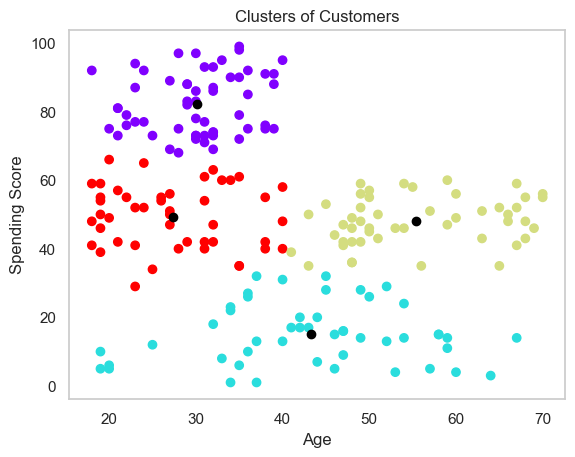

In [45]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.grid()
plt.scatter(centroid[:,0],centroid[:,1],color='black')
plt.title("Clusters of Customers")
plt.xlabel('Age')
plt.ylabel("Spending Score")
plt.show()

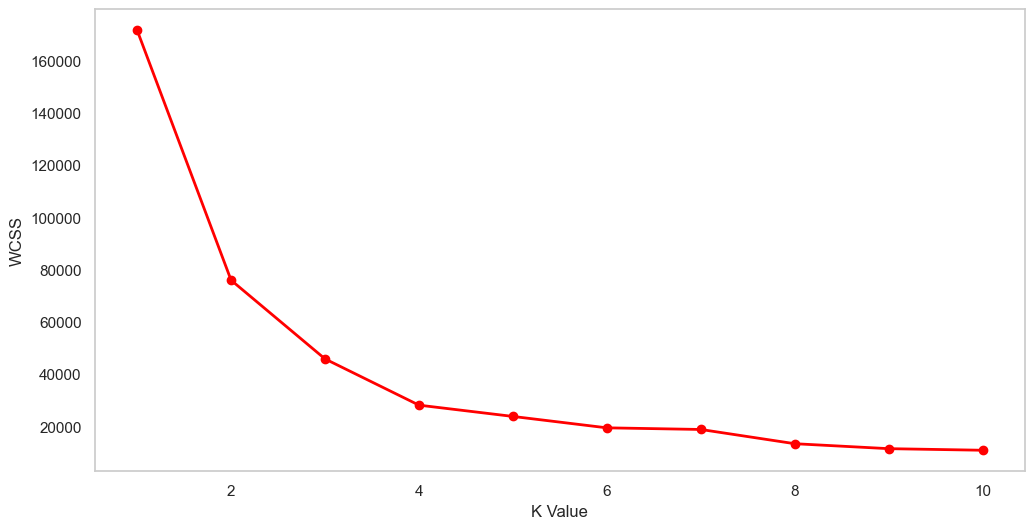

In [46]:
X2 = df.loc[:,["Annual_Income_(k$)","Spending_Score"]].values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker="o")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 0 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 0 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


In [48]:
centroid_1 = kmeans.cluster_centers_
print(centroid_1)

[[55.0875     49.7125    ]
 [25.72727273 79.36363636]
 [87.75       17.58333333]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]]


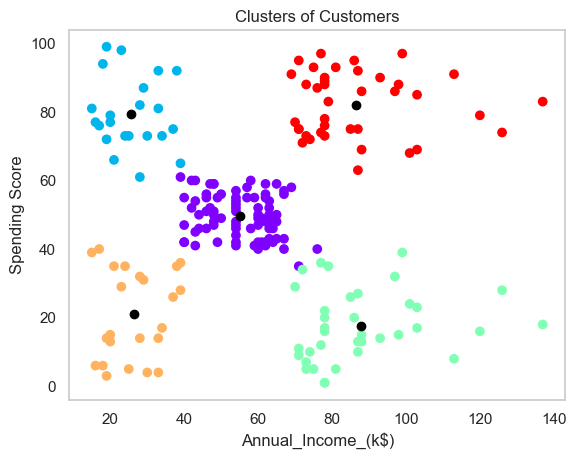

In [49]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.grid()
plt.scatter(centroid_1[:,0],centroid_1[:,1],color='black')
plt.title("Clusters of Customers")
plt.xlabel('Annual_Income_(k$)')
plt.ylabel("Spending Score")
plt.show()

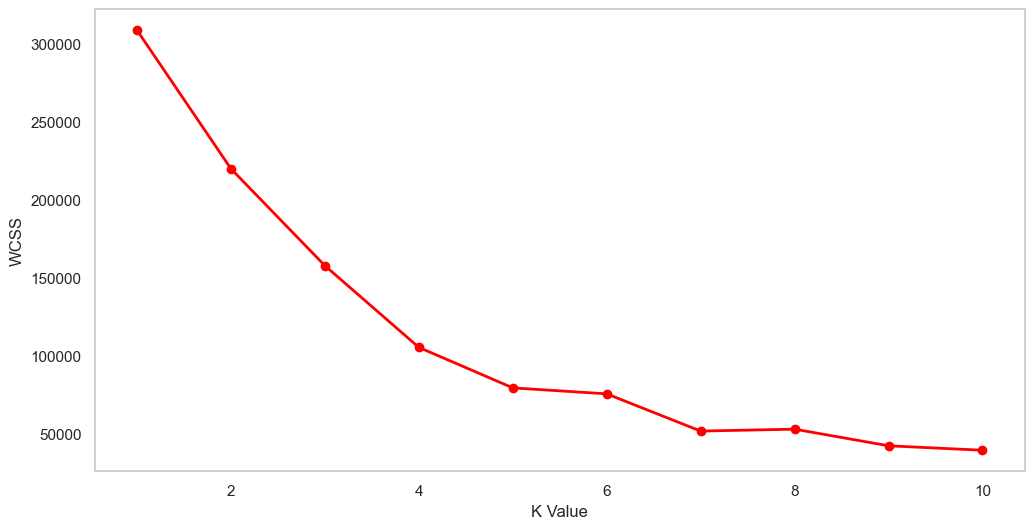

In [50]:
# Convert categorical variables to numerical using one-hot encoding
X3 = pd.get_dummies(df.iloc[:, 1:], drop_first=True)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker="o")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [51]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

print(label)

[3 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [52]:
centroid_2 = kmeans.cluster_centers_
print(centroid_2)

[[ 44.77083333  48.63541667  42.8125    ]
 [ 32.69230769  86.53846154  82.12820513]
 [ 42.63636364 108.18181818  21.27272727]
 [ 24.51851852  28.22222222  74.77777778]
 [ 39.48148148  78.37037037  17.55555556]]


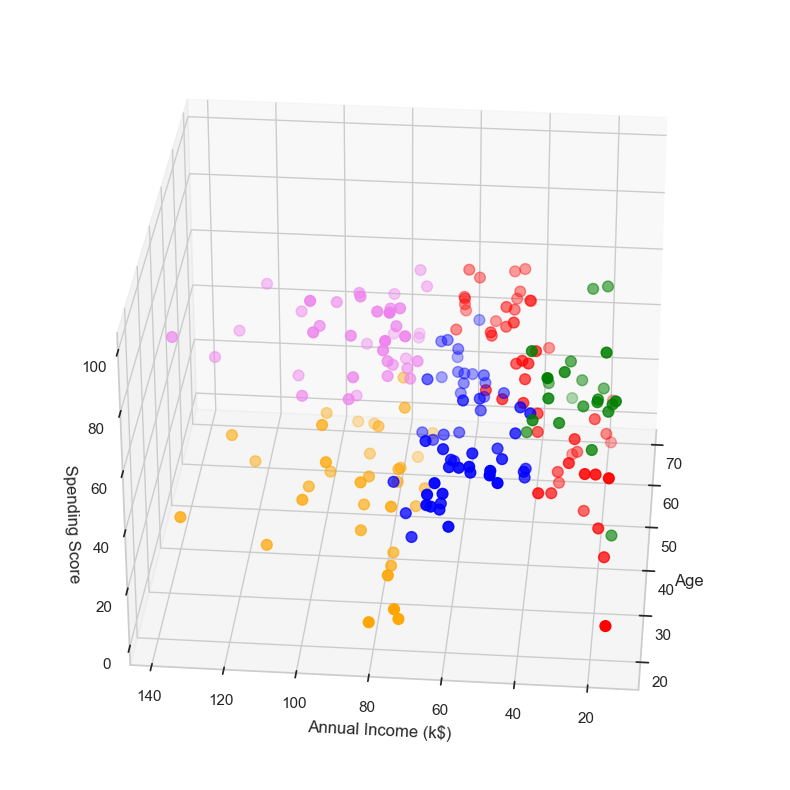

In [55]:
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df['Annual_Income_(k$)'][df.label == 0], df['Spending_Score'][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df['Annual_Income_(k$)'][df.label == 1], df['Spending_Score'][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df['Annual_Income_(k$)'][df.label == 2], df['Spending_Score'][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df['Annual_Income_(k$)'][df.label == 3], df['Spending_Score'][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df['Annual_Income_(k$)'][df.label == 4], df['Spending_Score'][df.label == 4], c='violet', s=60)

ax.view_init(30, 185)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')

plt.show()
